# DATA SET: Bank_Personal_Loan_Modelling.csv

Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Domain:Banking

Context:This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

Objective:The classification goal is to predict the likelihood of a liability customer buying personal loans.

## 1. Import the necessary libraries

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Importing libraries
import pandas as pd

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

import numpy as np

# calculate accuracy measures and confusion matrix
from sklearn import metrics

## 2. Read the data 

In [2]:
my_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

## 3. Basic EDA

In [3]:
my_data.shape

(5000, 14)

In [4]:
my_data.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


a.The variable ID does not add any particular information.

b.There are 2 nominal variables:

    1.ID    
    2.Zip Code
    
c.There are 2 Ordinal Categorical Variables:

    1.Family - Family size of the customer    
    2.Education - education level of the customer
    
d.There are 5 independent variables:

    1.Age:Age of the customer
    2.Experience:Years of experience of the customer
    3.Income:Annual income in dollars
    4.CCAvg:Average credit card spending
    5.Mortage:Value of House Mortgage
    
e.There are 5 binary category variables:

    1.Personal Loan:Did this customer accept the personal loan offered in the last campaign?
    2.Securities Account:Does the customer have a securities account with the bank?
    3.CD Account:Does the customer have a certificate of deposit (CD) account with the bank?
    4.Online:Does the customer use internet banking facilities?
    5.Credit Card:Does the customer use a credit card issued by UniversalBank?

f.And the Target variable is :Personal Loan

### a. Shape of the data

In [5]:
my_data.shape

(5000, 14)

There are 5000 customers.

In [6]:
my_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

### b. Data type of each attribute 

In [7]:
my_data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

Almost all atributes are numeric. 

## c.Check for the null values 

In [8]:
#null values
my_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## d. 5 point summary of numerical attributes 

In [9]:
my_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [10]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## e.Finding unique data 

In [11]:
my_data.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

## f.Ploting histogram to check that if data columns are normal or almost normal or not 

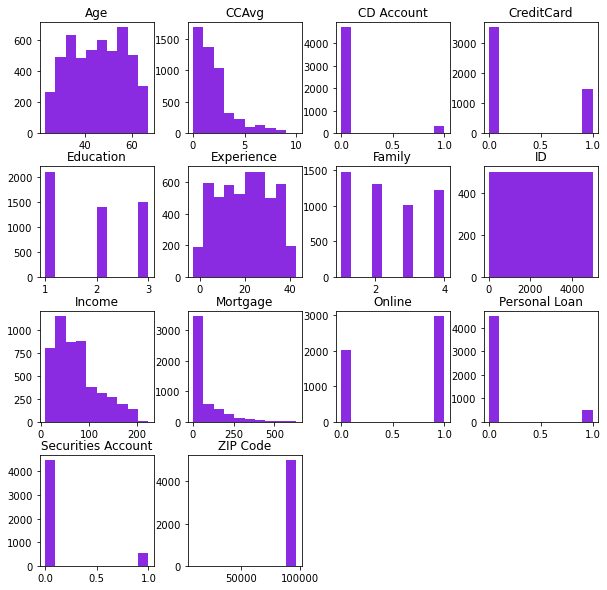

In [12]:
my_data.hist(figsize=(10,10),color="blueviolet",grid=False)
plt.show()

# 4.PairPlot

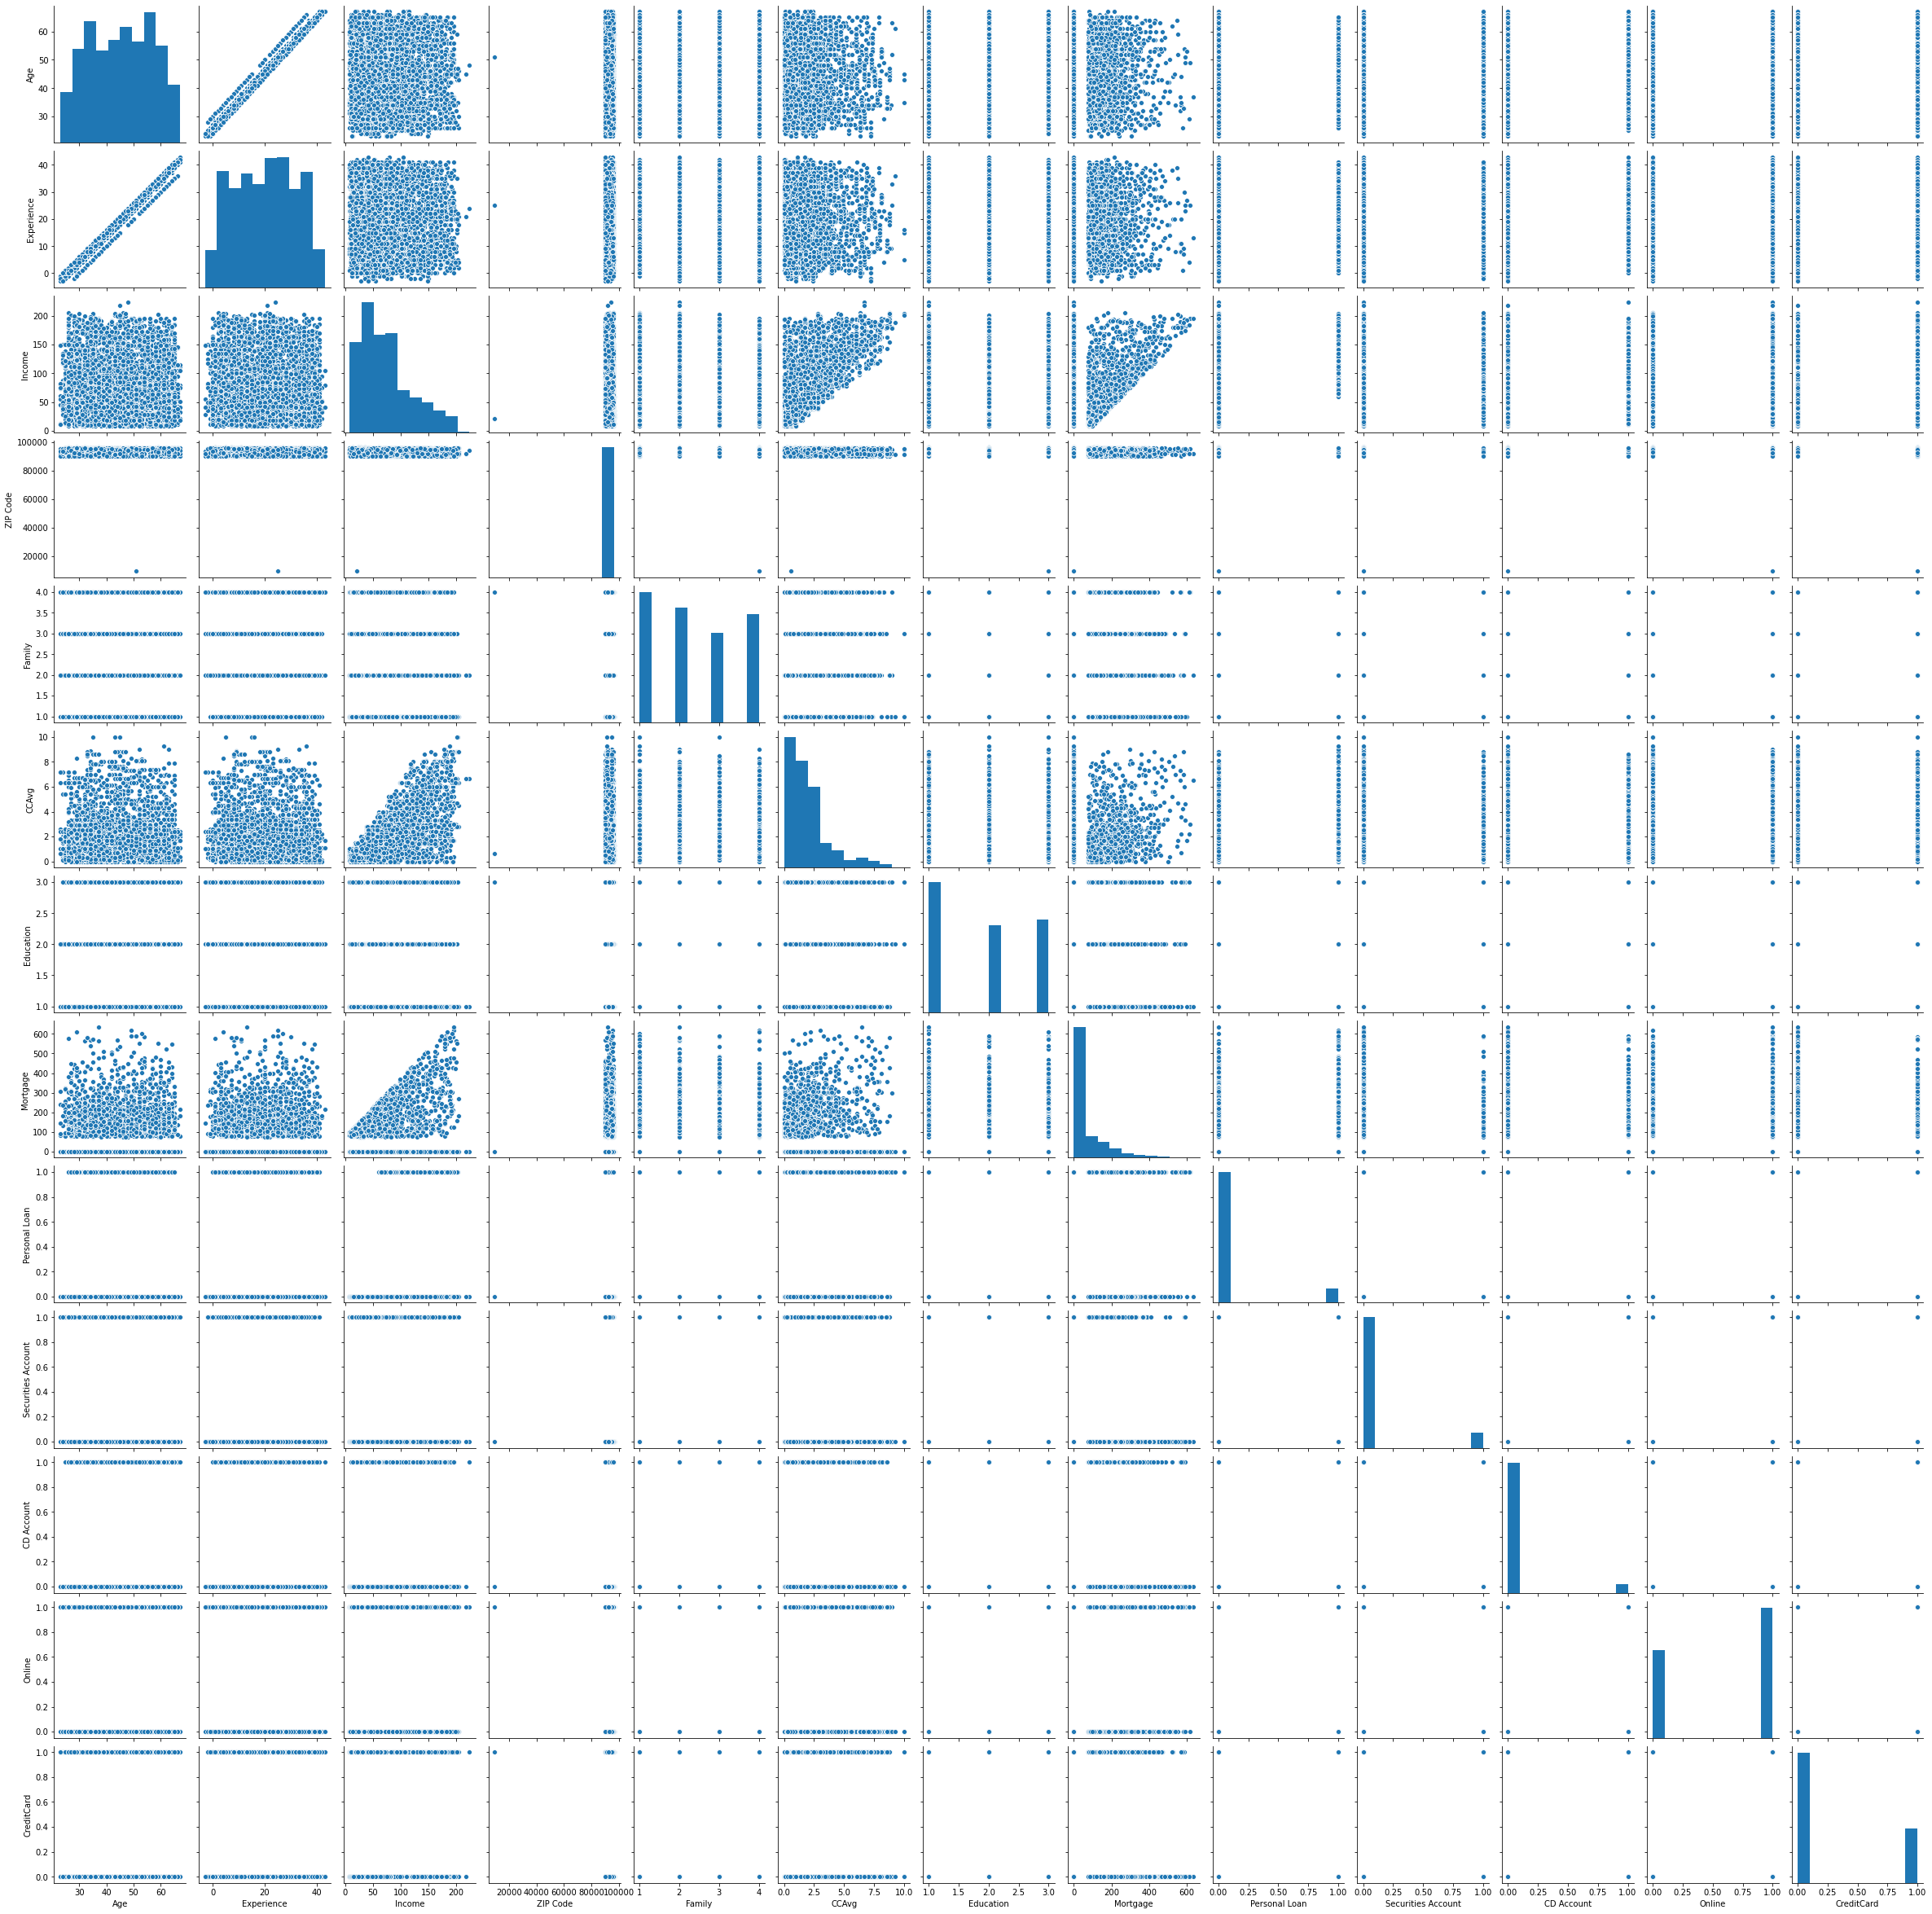

In [13]:
sns.pairplot(my_data.iloc[:,1:])

### 1.Here we can see "Age" feature is almost normally distributed where majority of customers are between age 30 to 60 years.Also we can see median is equal to mean.
### 2."Experience" feature is also almost normally distibuted and mean is also equal to median.But there are some negative values present which should be deleted, as Experience can not be negative.
### 3.We can see for "Income" , "CCAvg" , "Mortgage" distribution is positively skewed.
### 4.For "Income" mean is greater than median.Also we can confirm from this that majority of the customers have income between 45-55K.
### 5.For "CCAvg" majority of the customers spend less than 2.5K and the average spending is between 0-10K.
### 6.For "Mortage" we can see that almost 70% of the customers have Value of house mortgage less than 40K and the maximum value is 635K.
### 7.Distributin of "Family" and "Education" are evenly distributed

In [14]:
my_data[my_data['Experience'] < 0]['Experience'].count()

52

There are 52 records with negative experience.We have to clean it.

### Dealing with negative values 

In [15]:
#Replacing negative values from work experience column with 0 because work experience can never be negative

my_data['Experience'].replace([x for x in my_data['Experience'] if x<0],0,inplace=True)

### Check if there are any records still present with negative Experience 

In [16]:
my_data[my_data['Experience'] < 0]['Experience'].count()

0

In [17]:
my_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.119600,11.440484,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [18]:
my_data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

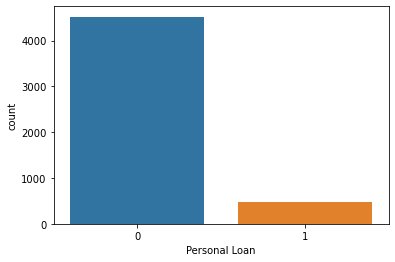

In [19]:
sns.countplot(my_data['Personal Loan'])

## 5.Boxplot 

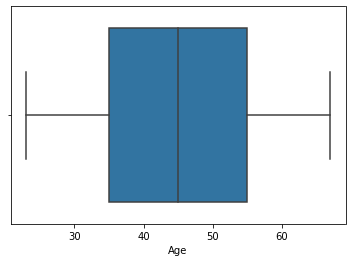

In [20]:
sns.boxplot(x=my_data["Age"])

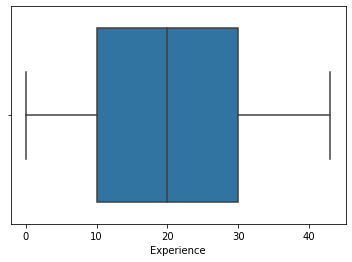

In [21]:
sns.boxplot(x=my_data["Experience"])

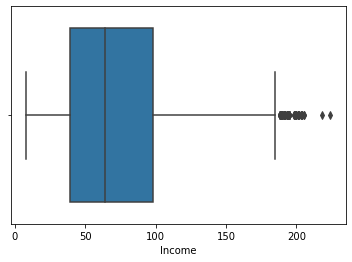

In [22]:
sns.boxplot(x=my_data["Income"])

In [23]:
sns.boxplot(x='Education',y='Income',hue='Personal_Loan',data=my_data)

ValueError: Could not interpret input 'Personal_Loan'

###  Here the customers whose education level is 1 is having more income than the others.

### We can see the customers who has taken the Personal Loan have the same Income levels. 

### Also the Customers with education levels 2 and 3 have same income level with no Personal Loan. 

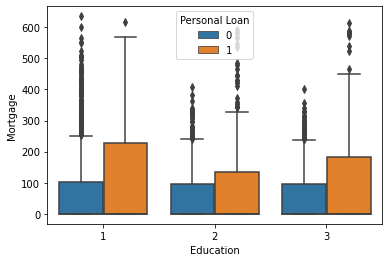

In [25]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=my_data)

### There are so many outliers in each case. 

### But the customers with and without Personal Loan  have high Mortage.

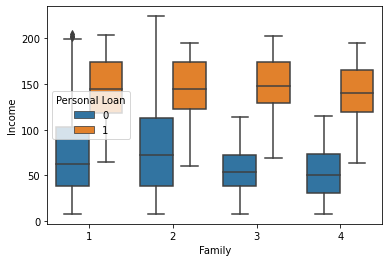

In [26]:
sns.boxplot(x="Family",y="Income",hue="Personal Loan",data=my_data)

###  Families with income less than 100K are less likely to take loan,than families with high income

# 6.CountPlot

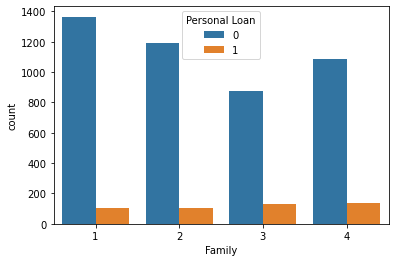

In [27]:
sns.countplot(x='Family',data=my_data,hue='Personal Loan')

### Ther is no that much impact on Personal Loan if we consider Family attribute. 

### But the Family with size 3 is taking more Personal loan as compare to other family size. 

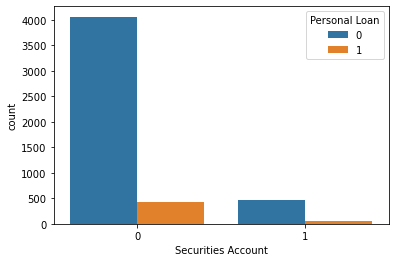

In [29]:
sns.countplot(x="Securities Account", data=my_data,hue="Personal Loan")

### The Majority is the customers  who do not have Personal loan have Securities Account.

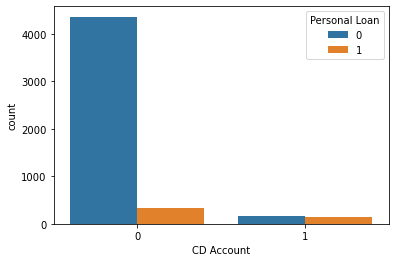

In [31]:
sns.countplot(x='CD Account',data=my_data,hue='Personal Loan')

### The customers having no CDAccount do not have Personal loan. 

### And the customers with CDAccount almost have Personal Loan.  

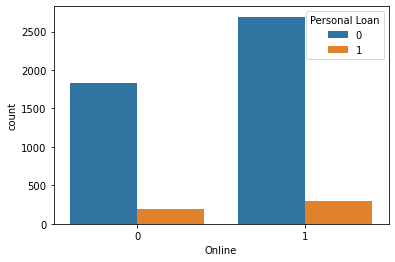

In [32]:
sns.countplot(x='Online',data=my_data,hue='Personal Loan')

### Customers with Personal Loan have less count in both the conditions. 

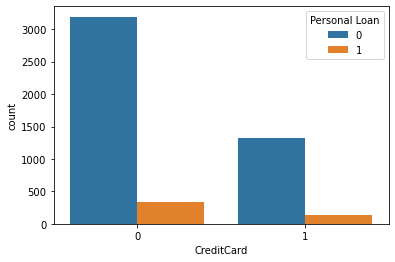

In [34]:
sns.countplot(x='CreditCard',data=my_data,hue='Personal Loan')

### Customers with Personal Loan have less count in both the conditions. 

# 7.ScatterPlot

Text(0.5, 1.0, 'Distribution of Education by Age and Experience')

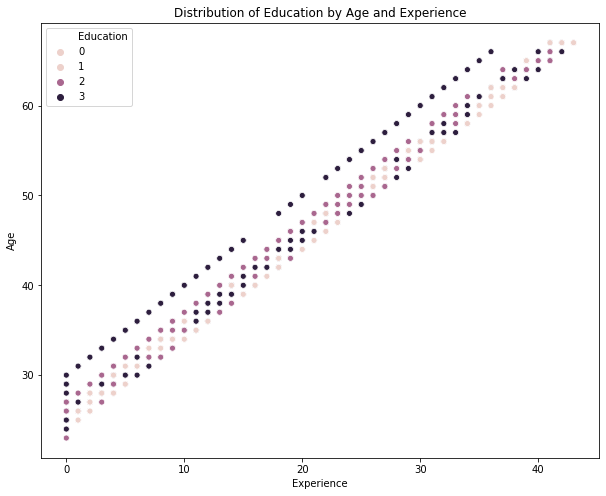

In [35]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = "Experience", y = "Age",data =my_data, hue = "Education")
plt.xlabel("Experience")
plt.ylabel("Age")
plt.title("Distribution of Education by Age and Experience")

### Experience and Age gives a positive correlation ,as Experience increases Age also increases.

### We can see with the help of colors of education level that more people are in the under graduate level.  

# 8.DistPlot

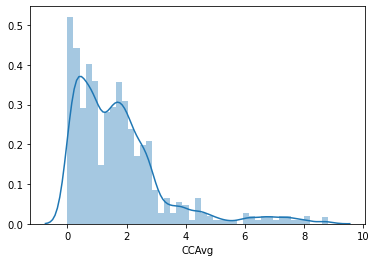

In [38]:
sns.distplot( my_data[my_data['Personal Loan'] == 0]['CCAvg'])

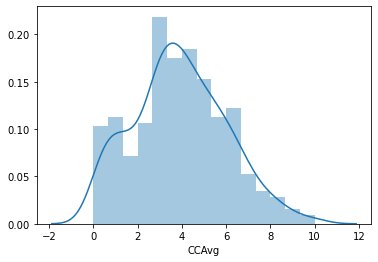

In [39]:
sns.distplot( my_data[my_data['Personal Loan'] == 1]['CCAvg'])

### Here we can see that the customers with higher CCAvg have Personal Loan. 

# 9.Calculate the correlation matrix

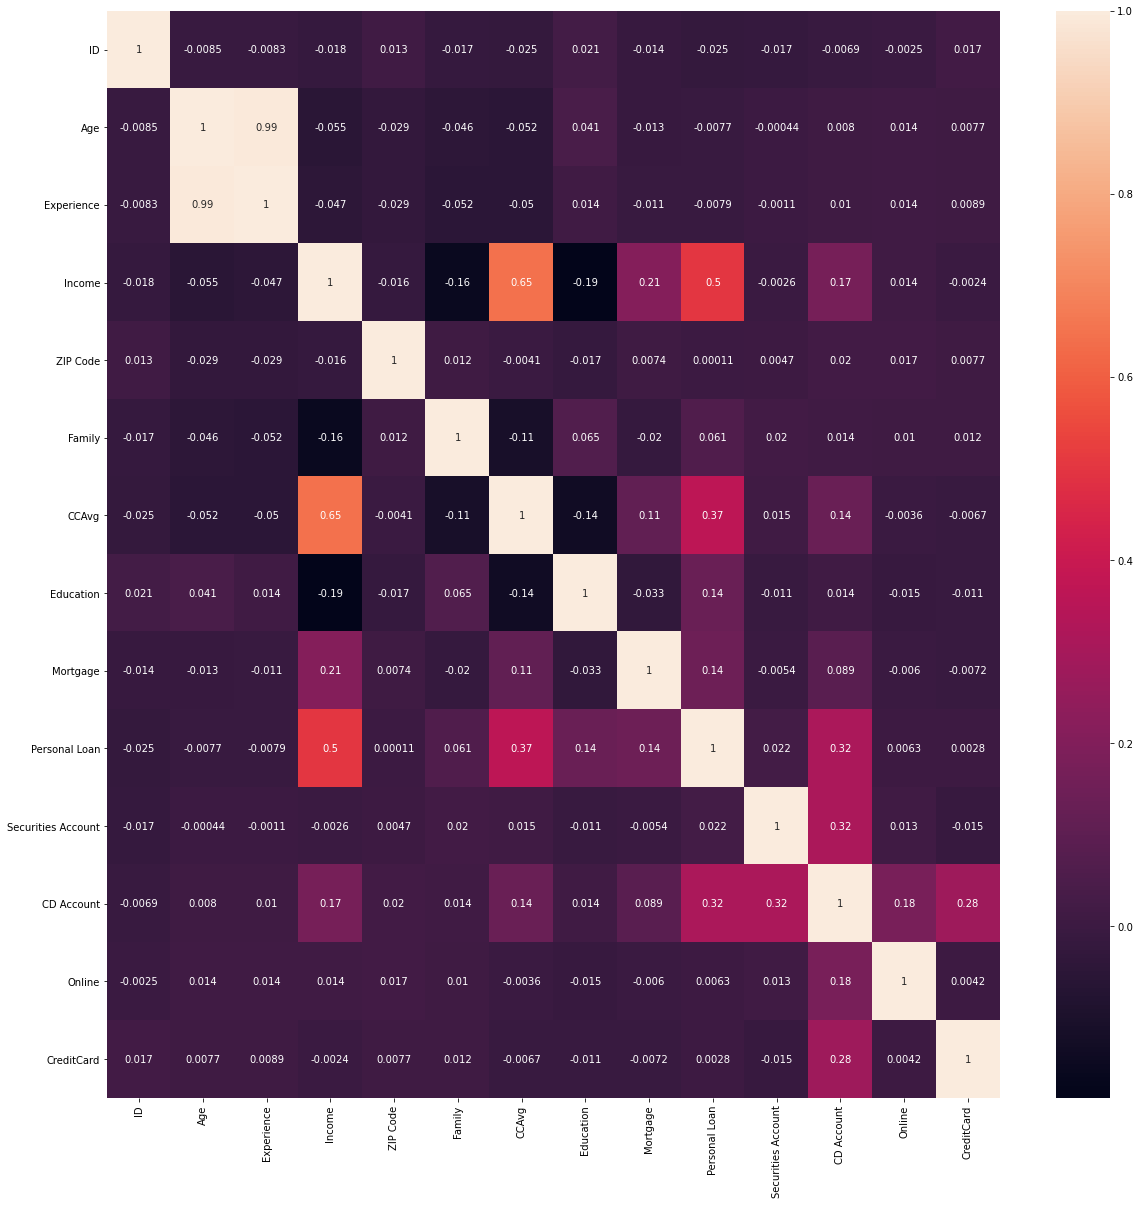

In [40]:
plt.figure(figsize=(20,20))
sns.heatmap(my_data.corr(),annot=True)

# 11.Conclusion from EDA:

### 1.Here we can see "Age" feature is almost normally distributed where majority of customers are between age 30 to 60 years.Also we can see median is equal to mean.
### 2."Experience" feature is also almost normally distibuted and mean is also equal to median.But there are some negative values present which should be deleted, as Experience can not be negative.
### 4.For "Income" mean is greater than median.Also we can confirm from this that majority of the customers have income between 45-55K.
### 5.For "CCAvg" majority of the customers spend less than 2.5K and the average spending is between 0-10K.
### 6.For "Mortage" we can see that almost 70% of the customers have Value of house mortgage less than 40K and the maximum value is 635K.
### 7.Distributin of "Family" and "Education" are evenly distributed
### 8.Income and CCAvg is moderately correlated.
### 9.Experience and Age gives a positive correlation.
### 10.Families with income less than 100K are less likely to take loan,than families with high income.
### 11.The customers whose education level is 1 is having more income than the others.
### 12.The customers with and without Personal Loan  have high Mortage.
###  13.Families with income less than 100K are less likely to take loan,than families with high income.
### 14.Ther is no that much impact on Personal Loan if we consider Family attribute. But the Family with size 3 is taking more Personal loan as compare to other family size. 
### 15.The Majority is the customers  who do not have Personal loan have Securities Account.
### 16.The customers having no CDAccount do not have Personal loan. 
### 17.Customers with Personal Loan have less count in both the conditions. 

# 12.Applying classification models (Logistic, K-NN and Naïve Bayes,SVM)

# A.Logistic regression 

In [41]:
#As the ID and ZIPCode is not that much impact in our analyasis and Experience is corelated with age so we are going to drop these three features.
data=my_data.drop(['ID','ZIP Code','Experience'], axis =1 )

In [42]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   Family              5000 non-null   int64  
 3   CCAvg               5000 non-null   float64
 4   Education           5000 non-null   int64  
 5   Mortgage            5000 non-null   int64  
 6   Personal Loan       5000 non-null   int64  
 7   Securities Account  5000 non-null   int64  
 8   CD Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 429.8 KB


In [44]:
data.shape

(5000, 11)

In [45]:
data["Personal Loan"].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split
array = data.values
X = array[:,0:9] # select all rows and first 10 columns which are the attributes
Y = array[:,10]   # select all rows and the 10th column which is the classification "0", "1"
test_size = 0.30 # taking 70:30 training and test set
seed = 15  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed) # To set the random state
type(X_train)

numpy.ndarray

In [49]:
# Fit the model on 30%
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print('Accuracy:',model_score)
print('confusion_matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
A=model_score  # Accuracy of Logistic regression model

Accuracy: 0.7493333333333333
confusion_matrix:
[[1047   15]
 [ 361   77]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# B.Naive Bayes

In [50]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [51]:
X = data.values[:,0:9]  ## Features
Y = data.values[:,10]  ## Target.values[:,10]  ## Target

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 7)

In [53]:
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB()

In [54]:
Y_pred = clf.predict(X_test)

In [55]:
B=accuracy_score(Y_test, Y_pred, normalize = True) #Accuracy of Naive Bayes' Model
print('Accuracy_score:',B)

Accuracy_score: 0.744


In [56]:
from sklearn.metrics import recall_score
print(recall_score(Y_test, Y_pred))

0.17817371937639198


In [57]:
print('Confusion_matrix:')
print(metrics.confusion_matrix(Y_test,Y_pred))

Confusion_matrix:
[[1036   15]
 [ 369   80]]


# C.KNN

In [58]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [59]:
X_std = pd.DataFrame(StandardScaler().fit_transform(data))
X_std.columns = data.columns

In [60]:
#split the dataset into training and test datasets
import numpy as np
from sklearn.model_selection import train_test_split

# Transform data into features and target
X = np.array(data.iloc[:,1:11]) 
y = np.array(data['Personal Loan'])

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [61]:
print(X_train.shape)
print(y_train.shape)

(4000, 10)
(4000,)


In [62]:
print(X_train.shape)
print(y_train.shape)

(4000, 10)
(4000,)


In [63]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# instantiate learning model (k = 1)
knn = KNeighborsClassifier(n_neighbors = 1)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))
# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors=7)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.949
0.942
0.942
0.94


In [64]:
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [65]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


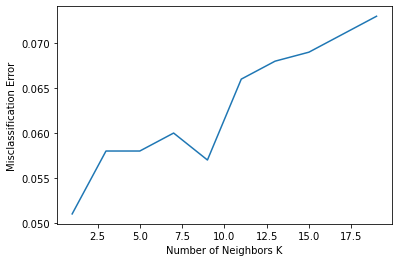

In [66]:
#Plot misclassification error vs k (with k value on X-axis) using matplotlib.
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [67]:
#Use k=1 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 1)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
C=accuracy_score(y_test, y_pred)   #Accuracy of KNN model
print('Accuracy_score:',C)    
print(recall_score(y_test, y_pred))


Accuracy_score: 0.949
0.7045454545454546


In [68]:
print('Confusion_matrix:')
print(metrics.confusion_matrix(y_test, y_pred))

Confusion_matrix:
[[887  25]
 [ 26  62]]


# D.SVM 

In [69]:
from sklearn.model_selection import train_test_split

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix

target = my_data["Personal Loan"]
features=my_data.drop(['ID','ZIP Code','Experience'], axis =1 )
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.30, random_state = 10)

In [70]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model= SVC(kernel='linear')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)


In [71]:
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

1.0
1.0


In [72]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[1360    0]
 [   0  140]]


In [73]:
#Store the accuracy results for each kernel in a dataframe for final comparison
resultsDf = pd.DataFrame({'Kernel':['Linear'], 'Accuracy': svc_model.score(X_train, y_train)})
resultsDf = resultsDf[['Kernel', 'Accuracy']]
resultsDf

,Kernel,Accuracy
0,Linear,1.0


In [74]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

SVC()

In [75]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9102857142857143
0.9066666666666666


In [76]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Kernel':['RBF'], 'Accuracy': svc_model.score(X_train, y_train)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Kernel', 'Accuracy']]
resultsDf

,Kernel,Accuracy
0,Linear,1.000000
0,RBF,0.910286


In [77]:
#Building a Support Vector Machine on train data(changing the kernel)
svc_model  = SVC(kernel='poly')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9228571428571428
0.9213333333333333


In [78]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Kernel':['Poly'], 'Accuracy': svc_model.score(X_train, y_train)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Kernel', 'Accuracy']]
resultsDf

,Kernel,Accuracy
0,Linear,1.000000
0,RBF,0.910286
0,Poly,0.922857


In [79]:
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

##print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.8673333333333333


In [80]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Kernel':['Sigmoid'], 'Accuracy': svc_model.score(X_train, y_train)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Kernel', 'Accuracy']]
resultsDf

,Kernel,Accuracy
0,Linear,1.000000
0,RBF,0.910286
0,Poly,0.922857
0,Sigmoid,0.871714


# 13.Comparison of different  Models:

In [81]:
print(A) #Accuracy of Logistic regression model

0.7493333333333333


In [82]:
print(B) #Accuracy of Naive Bayes' Model

0.744


In [83]:
print(C)  #Accuracy of KNN Model

0.949


In [84]:
resultsDf #Accuracy of SVM Model

,Kernel,Accuracy
0,Linear,1.000000
0,RBF,0.910286
0,Poly,0.922857
0,Sigmoid,0.871714


# Conclusion:

## The classification goal is to predict the likelihood of a liability customer buying personal loans.

## A bank wants a new marketing campaign; so that they need information about the correlation between the variables given in the dataset. 

## Here I used 4 classification models to study.

## From the accuracy scores , it seems like "KNN" algorithm have the highest accuracy and stability.

## But we can use SVM also as all the Kernels have good accuracy as well.